## Youtube US treading data analysis

### Data description
Youtube trending videos data for US from 2020-08-03 to 2022-06-18. Dataset was downloaded from Kaggle from this link https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset?select=US_youtube_trending_data.csv
There are two data files in csv format for the video information of the trending videos and the mapping file to map the category id to category name in English for the Youtube US site. 
The total records of the dataset is 24873 and the columns of the data looks like this.

video_id<br>
title<br>
publishAt<br>
channelId<br>
channelTitle<br>
trending_date<br>
tags<br>
view_count<br>
likes<br>
dislikes<br>
comment_count<br>
thumbnail_link<br>
comments_disabled<br>
rating_disabled<br>
description<br>

### Questions to ask about
The purpose of this analysis is to find the insights of the Youtube trending data and try to figure out the best way to create a trending video
1. What is the most popular categories in US? What is the least popular category?
2. Is there any relationship between the publish date and trending date?
3. Are more tags going to result in more views? How about more detailed description?
4. Are there any correlations between the view counts and the title length? 
5. Any difference among the types? Relation between the tag length and the popularity?
6. Is there a correlation between likes to comments ratio and likes to dislike ratio on Youtube?







## Import libraries and load datasets

In [217]:
# import libraries
import pandas as pd
import numpy as np    
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
from wordcloud import WordCloud
from collections import Counter

In [218]:
# Load the dataset from csv file to data frame
data_filename = 'data/US_youtube_trending_data.csv'
df = pd.read_csv(data_filename, encoding='utf-8')
df.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,__4i6CIg82o,Should you upgrade to the iPhone 12 and iPhone...,2020-10-13T18:07:51Z,UC2fd4raC6fXobex-tWGubMA,Travis MCP,28,2020-10-15T00:00:00Z,iphone 12|iphone 12 2020|iphone 12 cost|iphone...,79179,1735,197,787,https://i.ytimg.com/vi/__4i6CIg82o/default.jpg,False,False,"Apple released the iPhone 12, iPhone 12 Pro an..."
1,__4i6CIg82o,Should you upgrade to the iPhone 12 and iPhone...,2020-10-13T18:07:51Z,UC2fd4raC6fXobex-tWGubMA,Travis MCP,28,2020-10-16T00:00:00Z,iphone 12|iphone 12 2020|iphone 12 cost|iphone...,82667,1820,197,813,https://i.ytimg.com/vi/__4i6CIg82o/default.jpg,False,False,"Apple released the iPhone 12, iPhone 12 Pro an..."
2,__4i6CIg82o,Should you upgrade to the iPhone 12 and iPhone...,2020-10-13T18:07:51Z,UC2fd4raC6fXobex-tWGubMA,Travis MCP,28,2020-10-17T00:00:00Z,iphone 12|iphone 12 2020|iphone 12 cost|iphone...,84676,1859,199,831,https://i.ytimg.com/vi/__4i6CIg82o/default.jpg,False,False,"Apple released the iPhone 12, iPhone 12 Pro an..."
3,__4i6CIg82o,Should you upgrade to the iPhone 12 and iPhone...,2020-10-13T18:07:51Z,UC2fd4raC6fXobex-tWGubMA,Travis MCP,28,2020-10-18T00:00:00Z,iphone 12|iphone 12 2020|iphone 12 cost|iphone...,86384,1903,201,837,https://i.ytimg.com/vi/__4i6CIg82o/default.jpg,False,False,"Apple released the iPhone 12, iPhone 12 Pro an..."
4,__HnY71ibrA,Top 10 monkey moments,2022-01-14T18:00:15Z,UCvUmwreRrbxeR1mbmojj8fg,SomeThingElseYT,23,2022-01-16T00:00:00Z,funny monkey videos|monkey|monkey videos|Cute ...,196206,32274,0,1965,https://i.ytimg.com/vi/__HnY71ibrA/default.jpg,False,False,50th animation special. A monkey video made fo...


In [219]:
# Check the tail 5 rows of df
df.tail(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
136185,#NAME?,what happens if you get greedy and try to pull...,2022-06-16T01:11:59Z,UC_54BddY_xCboN2ktKg_yjw,Hydraulic Beanbag,1,2022-06-17T00:00:00Z,Blender|Animation|Animated Video|Blender Anima...,1876340,112561,0,2934,https://i.ytimg.com/vi/--gJDs10ShA/default.jpg,False,False,today was supposed to be my self appointed hed...
136186,#NAME?,Camping Under Beach Umbrella,2022-06-16T20:05:44Z,UCSnqXeK94-iNmwqGO__eJ5g,Steve Wallis,22,2022-06-18T00:00:00Z,[None],288793,22769,0,2698,https://i.ytimg.com/vi/-a5aLRH7TqI/default.jpg,False,False,This week I picked up a beach umbrella to camp...
136187,#NAME?,what happens if you get greedy and try to pull...,2022-06-16T01:11:59Z,UC_54BddY_xCboN2ktKg_yjw,Hydraulic Beanbag,1,2022-06-18T00:00:00Z,Blender|Animation|Animated Video|Blender Anima...,2342763,131047,0,3401,https://i.ytimg.com/vi/--gJDs10ShA/default.jpg,False,False,today was supposed to be my self appointed hed...
136188,#NAME?,Camping Under Beach Umbrella,2022-06-16T20:05:44Z,UCSnqXeK94-iNmwqGO__eJ5g,Steve Wallis,22,2022-06-19T00:00:00Z,[None],345491,25329,0,2836,https://i.ytimg.com/vi/-a5aLRH7TqI/default.jpg,False,False,This week I picked up a beach umbrella to camp...
136189,#NAME?,what happens if you get greedy and try to pull...,2022-06-16T01:11:59Z,UC_54BddY_xCboN2ktKg_yjw,Hydraulic Beanbag,1,2022-06-19T00:00:00Z,Blender|Animation|Animated Video|Blender Anima...,2656328,144482,0,3657,https://i.ytimg.com/vi/--gJDs10ShA/default.jpg,False,False,today was supposed to be my self appointed hed...


<br>
We can see that there are 16 attributes with column names in the top row of the table. All column names are properly named that we don't need to rename according to the naming convention. Let's show the details of the columns.

In [220]:
# Show details info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136190 entries, 0 to 136189
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           136190 non-null  object
 1   title              136190 non-null  object
 2   publishedAt        136190 non-null  object
 3   channelId          136190 non-null  object
 4   channelTitle       136190 non-null  object
 5   categoryId         136190 non-null  int64 
 6   trending_date      136190 non-null  object
 7   tags               136190 non-null  object
 8   view_count         136190 non-null  int64 
 9   likes              136190 non-null  int64 
 10  dislikes           136190 non-null  int64 
 11  comment_count      136190 non-null  int64 
 12  thumbnail_link     136190 non-null  object
 13  comments_disabled  136190 non-null  bool  
 14  ratings_disabled   136190 non-null  bool  
 15  description        132548 non-null  object
dtypes: bool(2), int64(5)

## Clean data
### Delete any row with any missing value

In [221]:
df['video_id'].value_counts()

#NAME?         1564
hdmx71UjBXs      36
aONT7atzqfw      35
mcUpeaSX8BE      34
wY6UyatwVTA      34
               ... 
IDKzukLrDH4       1
Ids_3JTcLxU       1
4xvXrJq9Mdc       1
UrwRsuqhK88       1
3VCwjRHNLcY       1
Name: video_id, Length: 24588, dtype: int64

In [222]:
# Delete the rows with any missing values
video_df = df.dropna()
video_df['video_id'].value_counts()

#NAME?         1520
hdmx71UjBXs      36
aONT7atzqfw      35
mcUpeaSX8BE      34
wY6UyatwVTA      34
               ... 
HMgtHpvrF9k       1
HM_fkwDB-Xg       1
HIv3ClkEhrA       1
HiMqYGgRT8A       1
AqvCkaHsmIY       1
Name: video_id, Length: 23847, dtype: int64

### Load category id file in json format rename category ids to the corresponding category names
<br>From the details of the data we can see that the type of the column 'categoryId' is int64 which doesn't show meaningful information about the category. 
<br>To show the category name we need to import the category mapping file and get the corresponding category name from there. 


In [223]:
# load the category id mapping file in json format
def get_category_id_dict_from_json(json_filename) :
  with open(json_filename) as f :
    d = json.load(f)

  dict = {}
  for category in d['items'] :
    # convert category id to int64 and set as the key to the dictionary
    dict[np.int64(category['id'])] = category['snippet']['title']
  
  return dict

In [224]:
# load the category id file and save the mapping of category id and category name into dictionary
json_filename = 'data/US_category_id.json'
category_id_dict = get_category_id_dict_from_json(json_filename)

In [225]:
# Remap the category_id to category name from the category_id_dict
video_df_cleaned = video_df.replace({"categoryId" : category_id_dict})

## Answering the questions with data visualization

### Q1. What is the most popular categories in US? What is the least popular category?

Text(0.5, 1.0, 'video count by categories from 2020-08-12 to 2022-06-19')

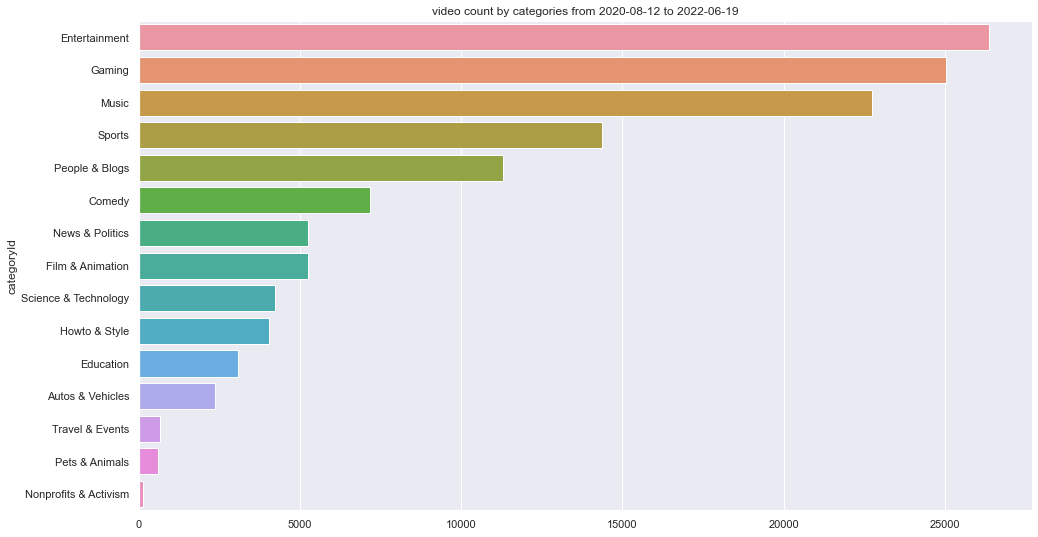

In [226]:
# Set the viz ratio
plt.figure(figsize=(16, 9))

# View counts grouped by categories
view_count = video_df_cleaned.groupby("categoryId").video_id.count().sort_values(ascending=False)

sns.barplot(x = view_count.values, y = view_count.index, orient="horizontal")

# Get the most recent collection date of trending
most_recent_date = video_df_cleaned["trending_date"].max()[:10]

# Get the most least recent collection date of the trending
most_least_date = video_df_cleaned["trending_date"].min()[:10]

plt.title("video count by categories from " + most_least_date + " to " + most_recent_date)

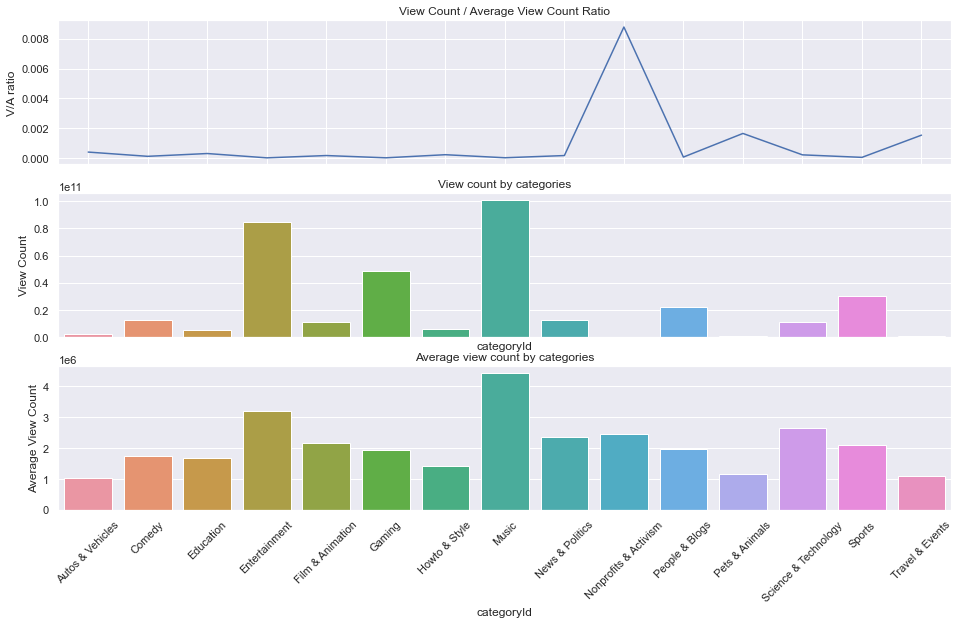

In [227]:
# The popularity of videos by categories
average_view_count = video_df_cleaned.groupby("categoryId").view_count.mean()
view_count = video_df_cleaned.groupby("categoryId").view_count.sum()
fig,axes  = plt.subplots(3, 1, sharex=True, figsize=(16, 9))

# show the ratio of average view count to total view count grouped by categories
sns.set(font_scale = 1)
va_ratio = average_view_count/view_count
p1 = sns.lineplot(data=va_ratio, ax=axes[0])
p1.set_ylabel("V/A ratio")
p1.set_title("View Count / Average View Count Ratio")

p2 = sns.barplot(x=view_count.index, y=view_count, ax=axes[1])
p2.set_ylabel("View Count")
p2.set_title("View count by categories")
plt.xticks(rotation=45)

p3 = sns.barplot(x=average_view_count.index, y=average_view_count, ax=axes[2])
p3.set_ylabel("Average View Count")
p3.set_title("Average view count by categories")

plt.show()

The music category is the most popular category in the trending data which also has the highest view count in average. The entertainment category has the most popularity in the trending but the view count and the average view count are lower than the Music category. The "Nonprofits & Activism" category has the lowest total view counts (which is the least popular category in the trending data) but has the highest average view count ratio. 


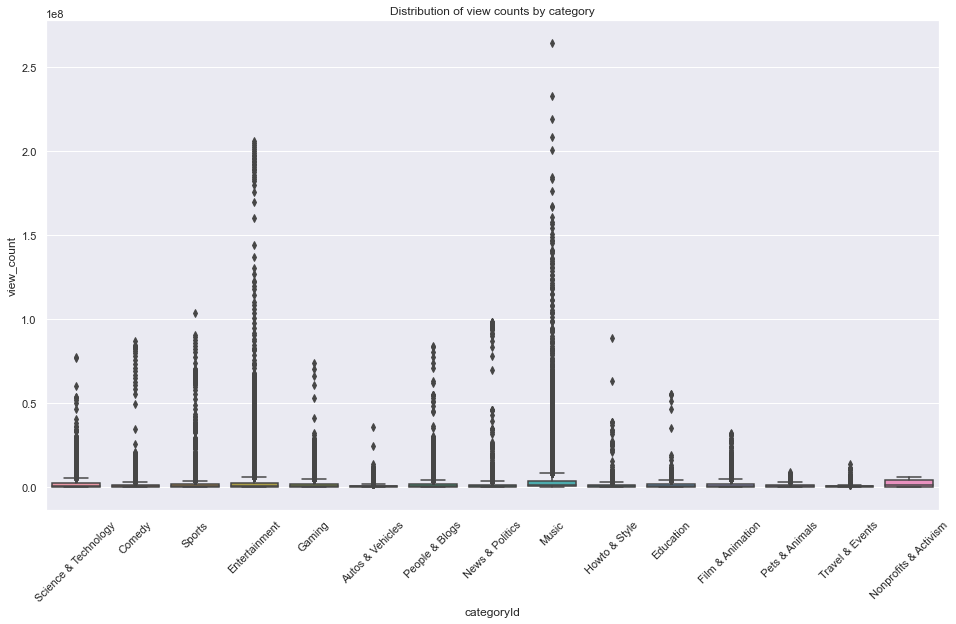

In [228]:
# The distribution of view counts grouped by category
sns.set(font_scale = 1)
plt.figure(figsize=(16,9))
sns.set_style("darkgrid")
sns.boxplot(x="categoryId", y="view_count", data=video_df_cleaned)
plt.xticks(rotation=45)
plt.title("Distribution of view counts by category")
plt.show()

From the boxplot above, we can see that the entertainment category and music category have the highest median. 
<br>As a new Youtuber, the Entertainment category and the Music category are the easiest category to start with which have very consistent high mean and high trending counts.

### Q2. Is there any relationship between the publish date and trending date?

In [229]:
video_df_cleaned['view_count']

0           79179
1           82667
2           84676
3           86384
4          196206
           ...   
136185    1876340
136186     288793
136187    2342763
136188     345491
136189    2656328
Name: view_count, Length: 132548, dtype: int64

Text(0.5, 1.0, 'Publish time and view counts')

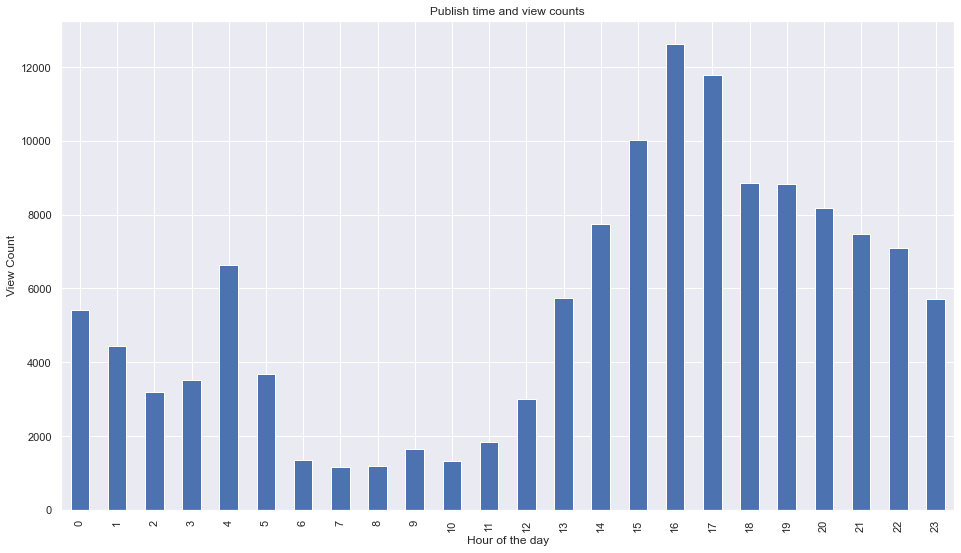

In [230]:
plt.figure(figsize=(16,9))
video_df_cleaned["publishTime"] = video_df_cleaned["publishedAt"].str[11:19]
video_df_cleaned["publishHour"] = video_df_cleaned["publishTime"].str[0:2]
video_df_cleaned.groupby(video_df_cleaned["publishHour"]).video_id.count().plot(kind="bar")
plt.xlabel("Hour of the day");
plt.ylabel("View Count");
plt.xticks(range(0,24), range(0,24))
plt.title("Publish time and view counts")

From 14:00 to 21:00 there are largest number of the trending videos while the peek time is between 15:00 to 17:00. The smallest trending videos published between 0:00 to 13:00. The best time to publish a new video is between 15:00 to 17:00.

### Q3. Are more tags going to result in more views? How about more detailed description?

#### Correlation between attributes

In [231]:
video_df_cleaned["title_length"] = video_df_cleaned["title"].apply(lambda x: len(x))
video_df_cleaned.corr()

,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,title_length
view_count,1.000000,0.836324,0.630611,0.533230,0.003887,0.009780,-0.027665
likes,0.836324,1.000000,0.611529,0.705698,-0.026311,-0.028247,-0.071467
dislikes,0.630611,0.611529,1.000000,0.519794,0.012537,-0.015968,-0.024470
comment_count,0.533230,0.705698,0.519794,1.000000,-0.017670,-0.005912,-0.024682
comments_disabled,0.003887,-0.026311,0.012537,-0.017670,1.000000,0.168199,0.036588
ratings_disabled,0.009780,-0.028247,-0.015968,-0.005912,0.168199,1.000000,-0.007941
title_length,-0.027665,-0.071467,-0.024470,-0.024682,0.036588,-0.007941,1.000000


<AxesSubplot:>

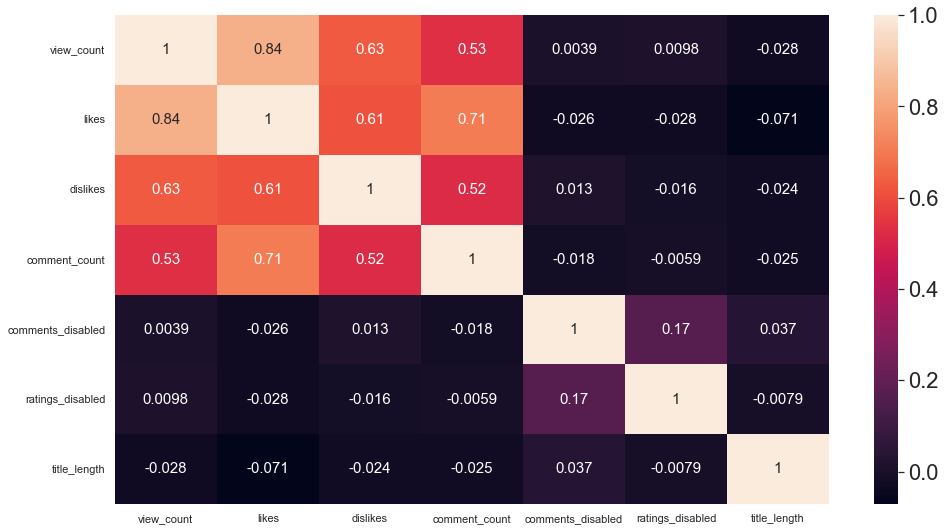

In [232]:
#### The heatmap of the correlation between the attributes
fig, axes = plt.subplots(figsize = (16, 9))
sns.set(font_scale=2)
sns.heatmap(video_df_cleaned.corr(), annot=True, annot_kws={'size': 15})

From the heatmap, we can see that the view count and likes have correlated with each other. To see the details of the correlations between view counts and likes, let's use the scatter plot to visualize the distribution.


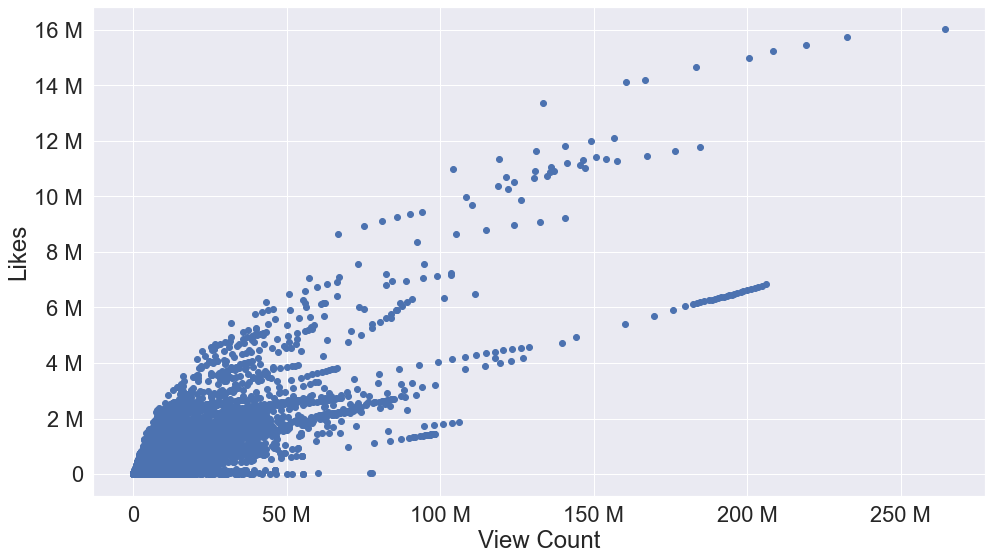

In [233]:
fig, axes = plt.subplots(figsize = (16, 9))
axes.ticklabel_format(style='plain')
plt.scatter(x=video_df_cleaned["view_count"], y=video_df_cleaned["likes"])
plt.xlabel("View Count")
plt.ylabel("Likes")
axes.xaxis.set_major_formatter(ticker.EngFormatter())
axes.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

As the the views increases the likes also increases in the trending videos.

## Q4. Most common words in the video titles?

In [234]:
# find the most frequent words
all_title_strings = list(video_df_cleaned["title"].apply(lambda x:x.split()))
all_words_list = [word for str in all_title_strings for word in str]
Counter(all_words_list).most_common(100)


[('-', 33829),
 ('|', 33173),
 ('The', 16172),
 ('the', 11532),
 ('I', 10807),
 ('in', 9700),
 ('(Official', 9626),
 ('&', 8859),
 ('to', 8278),
 ('Video)', 8205),
 ('a', 7225),
 ('of', 7220),
 ('A', 5400),
 ('and', 5222),
 ('Music', 5030),
 ('on', 4395),
 ('Trailer', 4204),
 ('Minecraft', 3876),
 ('My', 3833),
 ('To', 3760),
 ('with', 3355),
 ('Official', 3320),
 ('at', 3269),
 ('2021', 3230),
 ('In', 3198),
 ('You', 3103),
 ('���������', 3041),
 ('Highlights', 2887),
 ('is', 2846),
 ('vs', 2800),
 ('2', 2788),
 ('vs.', 2772),
 ('[Official', 2736),
 ('for', 2724),
 ('THE', 2658),
 ('ft.', 2603),
 ('How', 2405),
 ('With', 2241),
 ('Lil', 2199),
 ('Video]', 2161),
 ('Game', 2072),
 ('New', 2060),
 ('1', 1960),
 ('2020', 1902),
 ('Season', 1856),
 ('HIGHLIGHTS', 1846),
 ('First', 1834),
 ('Is', 1752),
 ('On', 1705),
 ('What', 1691),
 ('NBA', 1671),
 ('This', 1634),
 ('For', 1608),
 ('3', 1605),
 ('We', 1588),
 ('from', 1522),
 ('my', 1522),
 ('5', 1512),
 ('x', 1484),
 ('But', 1483),
 ('

The most common words in the titles in the treading videos are '-' and '|' which is not a surprise because they are the most popular characters to separate words observation in titles according to the search engine optimization. 
We can also see that the words "Official", "Video", "Music", "Trailer", "Minecraft" and "2021" are common in the trending videos while the word "(Official" and "Official" plays a very important role in the title naming in the trending videos. 

The word cloud of the titles in the trending videos shows visualization of the most frequent words in the titles in-depth.

<function matplotlib.pyplot.show(close=None, block=None)>

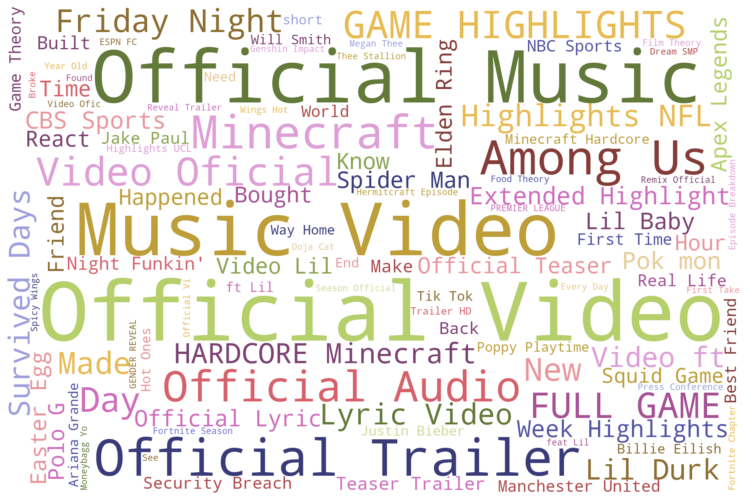

In [235]:
# The bigger font size, the more frequently the word appears in the titles in trending videos.
wc = WordCloud(width=1920, height=1280, max_words=100, background_color="white", colormap="tab20b").generate(" ".join(all_words_list))
plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show

### Q5. Relation between the number of tags and the popularity?

Text(0.5, 1.0, 'Correlation of average number of tags by category')

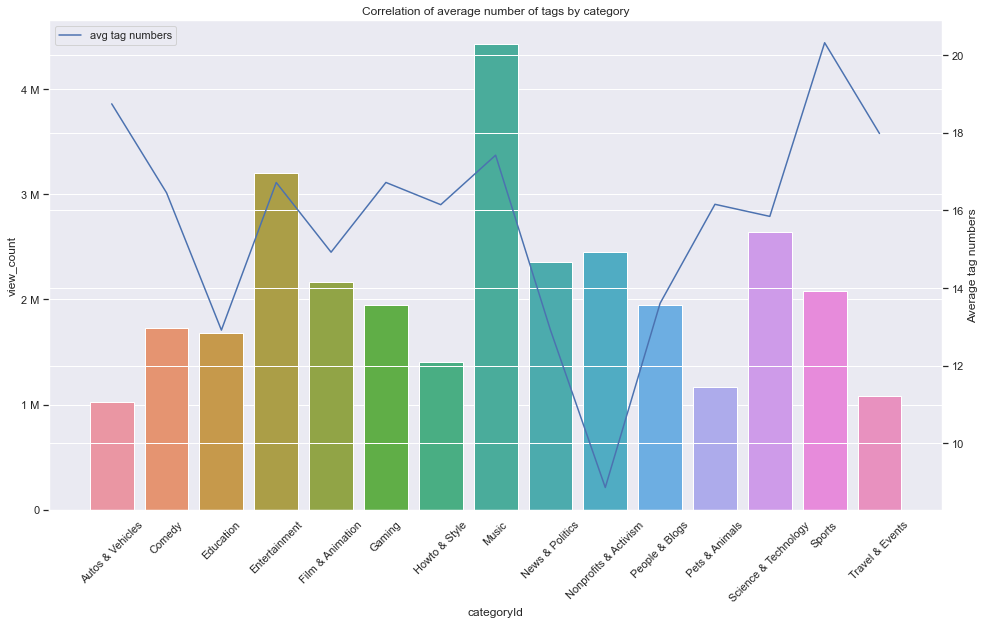

In [236]:
# get the number of tags for all data
sns.set(font_scale = 1)
plt.figure(figsize=(16,9))
video_df_cleaned["num_of_tags"]  = video_df_cleaned["tags"].apply(lambda x: len(x.split('|')))
# number of tags by category
avg_tags = video_df_cleaned.groupby(video_df_cleaned["categoryId"]).num_of_tags.mean()
plt.xticks(rotation=45)
ax1 = sns.barplot(x=average_view_count.index, y=average_view_count)
ax1.yaxis.set_major_formatter(ticker.EngFormatter())
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=avg_tags.index, y=avg_tags, label="avg tag numbers")
ax2.set_ylabel("Average tag numbers")
plt.title("Correlation of average number of tags by category")

From above graph, we can see that there isn't any significant correlation between the tag numbers and view counts by categories.

### Q6. Is there a correlation between likes to comments ratio and likes to dislike ratio on Youtube?

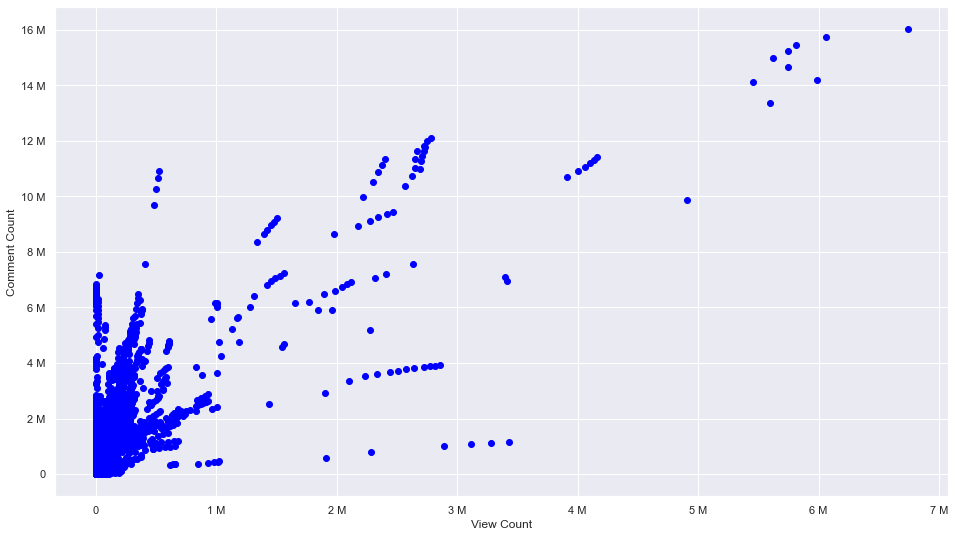

In [237]:
# correlation between likes and comment counts
fig, axes = plt.subplots(figsize = (16, 9))
axes.ticklabel_format(style='plain')
plt.scatter(x=video_df_cleaned["comment_count"], y=video_df_cleaned["likes"], color="blue")
plt.xlabel("View Count")
plt.ylabel("Comment Count")
axes.xaxis.set_major_formatter(ticker.EngFormatter())
axes.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()


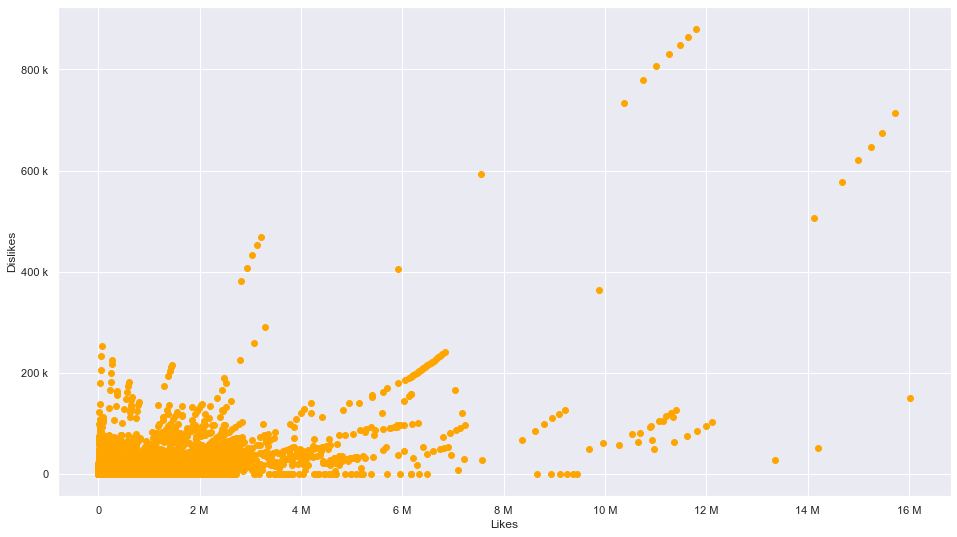

In [238]:
# To show the correlation between likes and dislikes
fig, axes = plt.subplots(figsize = (16, 9))
plt.scatter(x=video_df_cleaned["likes"], y=video_df_cleaned["dislikes"], color="orange")
plt.xlabel("Likes")
plt.ylabel("Dislikes")
axes.xaxis.set_major_formatter(ticker.EngFormatter())
axes.yaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

There is no correlation between likes and dislikes either.

## Conclusion

As a new youtube content creator, we'd better to produce videos in the category of Entertainment and Music which have the most average view count in general. The best publish time is between 15:00 and 17:00 USA time. <br>
The title should contain at least one of the most common keywords to optimize the Youtube search engine to drive more visits at the beginning. For example, the keywords "Official", "Video", "Trailer" and "2021" (2022 if you publish in year 2022)<br>
Don't forget to use '-' and '|' in the title.<br>
There is significant correlation between the view counts and the number of likes. Please try to remind the visitor to like in your video.<br>
The correlation between the likes and comment counts is also positive which means the more comments that visitors leave, the more likes you gain.<br>